# Smith 2022 vs Reanalysis

I want to compare the results of 2022 with reality.

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import sys 
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 
import functions.data_wrangling as data
import functions.aos_functions as aos

In [4]:
jra_djf = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/seasonal/jra55_seasonal-djf_uvtw_ubar_ep-pr.nc',
                        parallel=True, chunks={'time': 31})
jra_djf

<xarray.Dataset>
Dimensions:  (time: 58, level: 37, lat: 73, lon: 144)
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * time     (time) datetime64[ns] 1958-12-01 1959-12-01 ... 2015-12-01
Data variables:
    u        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    v        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ep1      (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    ep2      (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div2     (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>

# Compare to PAMIP response

### Temperature

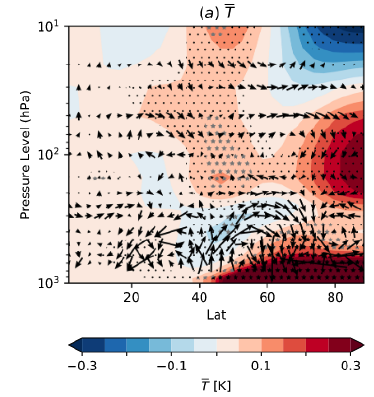

(<xarray.DataArray (lat: 37, level: 32)>
 dask.array<mul, shape=(37, 32), dtype=float64, chunksize=(37, 32), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
   * level    (level) float64 10.0 20.0 30.0 50.0 ... 925.0 950.0 975.0 1e+03,
 <xarray.DataArray (lat: 37, level: 32)>
 dask.array<mul, shape=(37, 32), dtype=float64, chunksize=(37, 32), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
   * level    (level) float64 10.0 20.0 30.0 50.0 ... 925.0 950.0 975.0 1e+03)

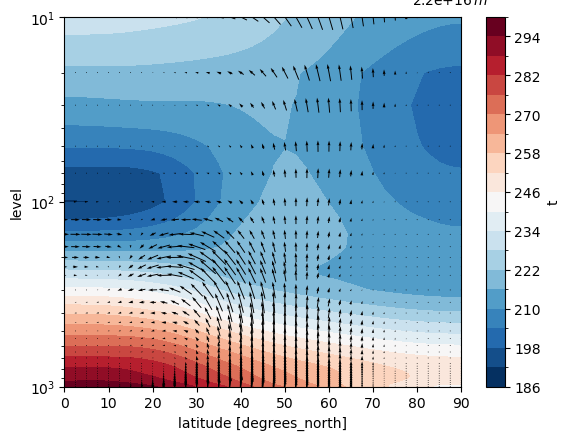

In [5]:
jra_djf_NH = jra_djf.sel(level=slice(10, 1000))
jra_djf_NH = jra_djf_NH.sel(lat=slice(90, 0))

Fphi = jra_djf_NH.ep1.mean(('time'))#.isel(skip)
Fp = jra_djf_NH.ep2.mean(('time'))#.isel(skip)

fig, ax = plt.subplots()
jra_djf_NH.t.mean(('time', 'lon')).plot.contourf(levels=20, yscale='log', cmap='RdBu_r')
aos.PlotEPfluxArrows(jra_djf_NH.lat, jra_djf_NH.level, Fphi, Fp, 
                     ax=ax, fig=fig, pivot='mid', yscale='log')

### $F_p$

(<xarray.DataArray (lat: 37, level: 32)>
 dask.array<mul, shape=(37, 32), dtype=float64, chunksize=(37, 32), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
   * level    (level) float64 10.0 20.0 30.0 50.0 ... 925.0 950.0 975.0 1e+03,
 <xarray.DataArray (lat: 37, level: 32)>
 dask.array<mul, shape=(37, 32), dtype=float64, chunksize=(37, 32), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
   * level    (level) float64 10.0 20.0 30.0 50.0 ... 925.0 950.0 975.0 1e+03)

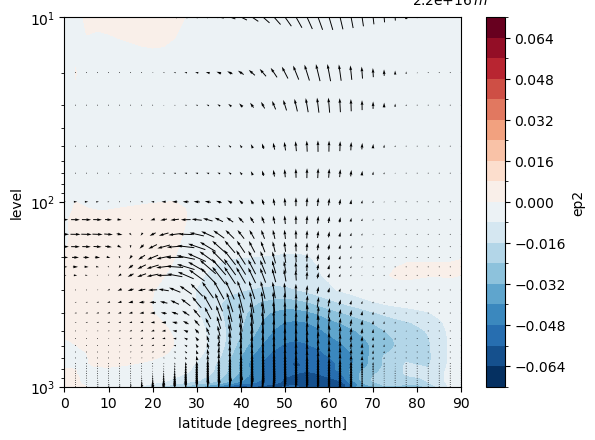

In [6]:
Fphi = jra_djf_NH.ep1.mean(('time'))#.isel(skip)
Fp = jra_djf_NH.ep2.mean(('time'))#.isel(skip)

fig, ax = plt.subplots()
jra_djf_NH.ep2.mean(('time')).plot.contourf(levels=20, yscale='log', cmap='RdBu_r')
aos.PlotEPfluxArrows(jra_djf_NH.lat, jra_djf_NH.level, Fphi, Fp, 
                     ax=ax, fig=fig, pivot='mid', yscale='log')

### $\nabla_p F_p$

(<xarray.DataArray (lat: 37, level: 32)>
 dask.array<mul, shape=(37, 32), dtype=float64, chunksize=(37, 32), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
   * level    (level) float64 10.0 20.0 30.0 50.0 ... 925.0 950.0 975.0 1e+03,
 <xarray.DataArray (lat: 37, level: 32)>
 dask.array<mul, shape=(37, 32), dtype=float64, chunksize=(37, 32), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
   * level    (level) float64 10.0 20.0 30.0 50.0 ... 925.0 950.0 975.0 1e+03)

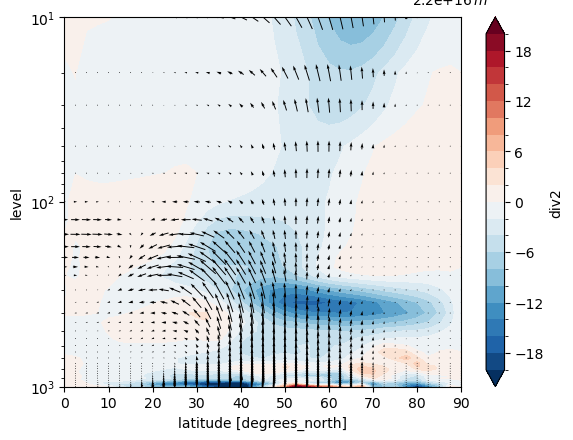

In [11]:
Fphi = jra_djf_NH.ep1.mean(('time'))#.isel(skip)
Fp = jra_djf_NH.ep2.mean(('time'))#.isel(skip)

fig, ax = plt.subplots()
jra_djf_NH.div2.mean(('time')).plot.contourf(levels=np.linspace(-20,20,21), extend='both', yscale='log', cmap='RdBu_r')
aos.PlotEPfluxArrows(jra_djf_NH.lat, jra_djf_NH.level, Fphi, Fp, 
                     ax=ax, fig=fig, pivot='mid', yscale='log')

(<xarray.DataArray (lat: 37, level: 31)>
 dask.array<mul, shape=(37, 31), dtype=float64, chunksize=(37, 31), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
   * level    (level) float64 10.0 20.0 30.0 50.0 ... 900.0 925.0 950.0 975.0,
 <xarray.DataArray (lat: 37, level: 31)>
 dask.array<mul, shape=(37, 31), dtype=float64, chunksize=(37, 31), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
   * level    (level) float64 10.0 20.0 30.0 50.0 ... 900.0 925.0 950.0 975.0)

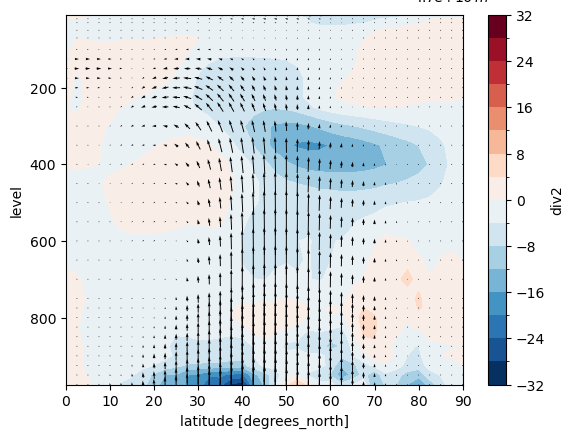

In [ ]:
Fphi = jra_djf_NH.ep1.mean(('time'))#.isel(skip)
Fp = jra_djf_NH.ep2.mean(('time'))#.isel(skip)

fig, ax = plt.subplots()
jra_djf_NH.div2.mean(('time')).plot.contourf(levels=20, cmap='RdBu_r')
aos.PlotEPfluxArrows(jra_djf_NH.lat, jra_djf_NH.level, Fphi, Fp, 
                     ax=ax, fig=fig, pivot='mid')

### $\nabla_\phi F_\phi$

(<xarray.DataArray (lat: 35, level: 31)>
 dask.array<mul, shape=(35, 31), dtype=float64, chunksize=(35, 31), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 85.0 82.5 80.0 77.5 75.0 ... 10.0 7.5 5.0 2.5 0.0
   * level    (level) float64 10.0 20.0 30.0 50.0 ... 900.0 925.0 950.0 975.0,
 <xarray.DataArray (lat: 35, level: 31)>
 dask.array<mul, shape=(35, 31), dtype=float64, chunksize=(35, 31), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 85.0 82.5 80.0 77.5 75.0 ... 10.0 7.5 5.0 2.5 0.0
   * level    (level) float64 10.0 20.0 30.0 50.0 ... 900.0 925.0 950.0 975.0)

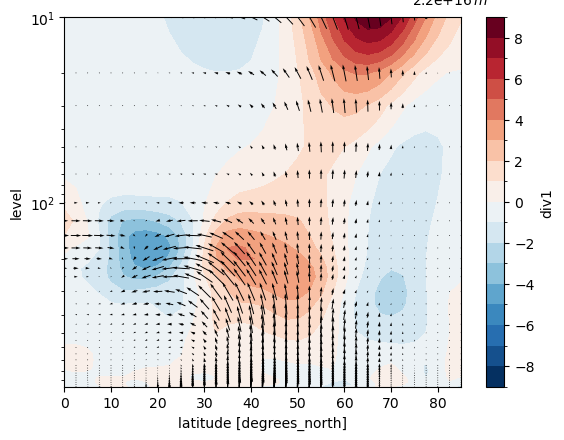

In [ ]:
jra_djf_NH2 = jra_djf_NH.sel(lat=slice(85,0))

Fphi = jra_djf_NH2.ep1.mean(('time'))#.isel(skip)
Fp = jra_djf_NH2.ep2.mean(('time'))#.isel(skip)

fig, ax = plt.subplots()
jra_djf_NH2.div1.mean(('time')).plot.contourf(levels=20, yscale='log', cmap='RdBu_r')
aos.PlotEPfluxArrows(jra_djf_NH2.lat, jra_djf_NH2.level, Fphi, Fp, 
                     ax=ax, fig=fig, pivot='mid', yscale='log')